# <font color='red'>Principle Component Analysis- Dimension Reduction</font> 

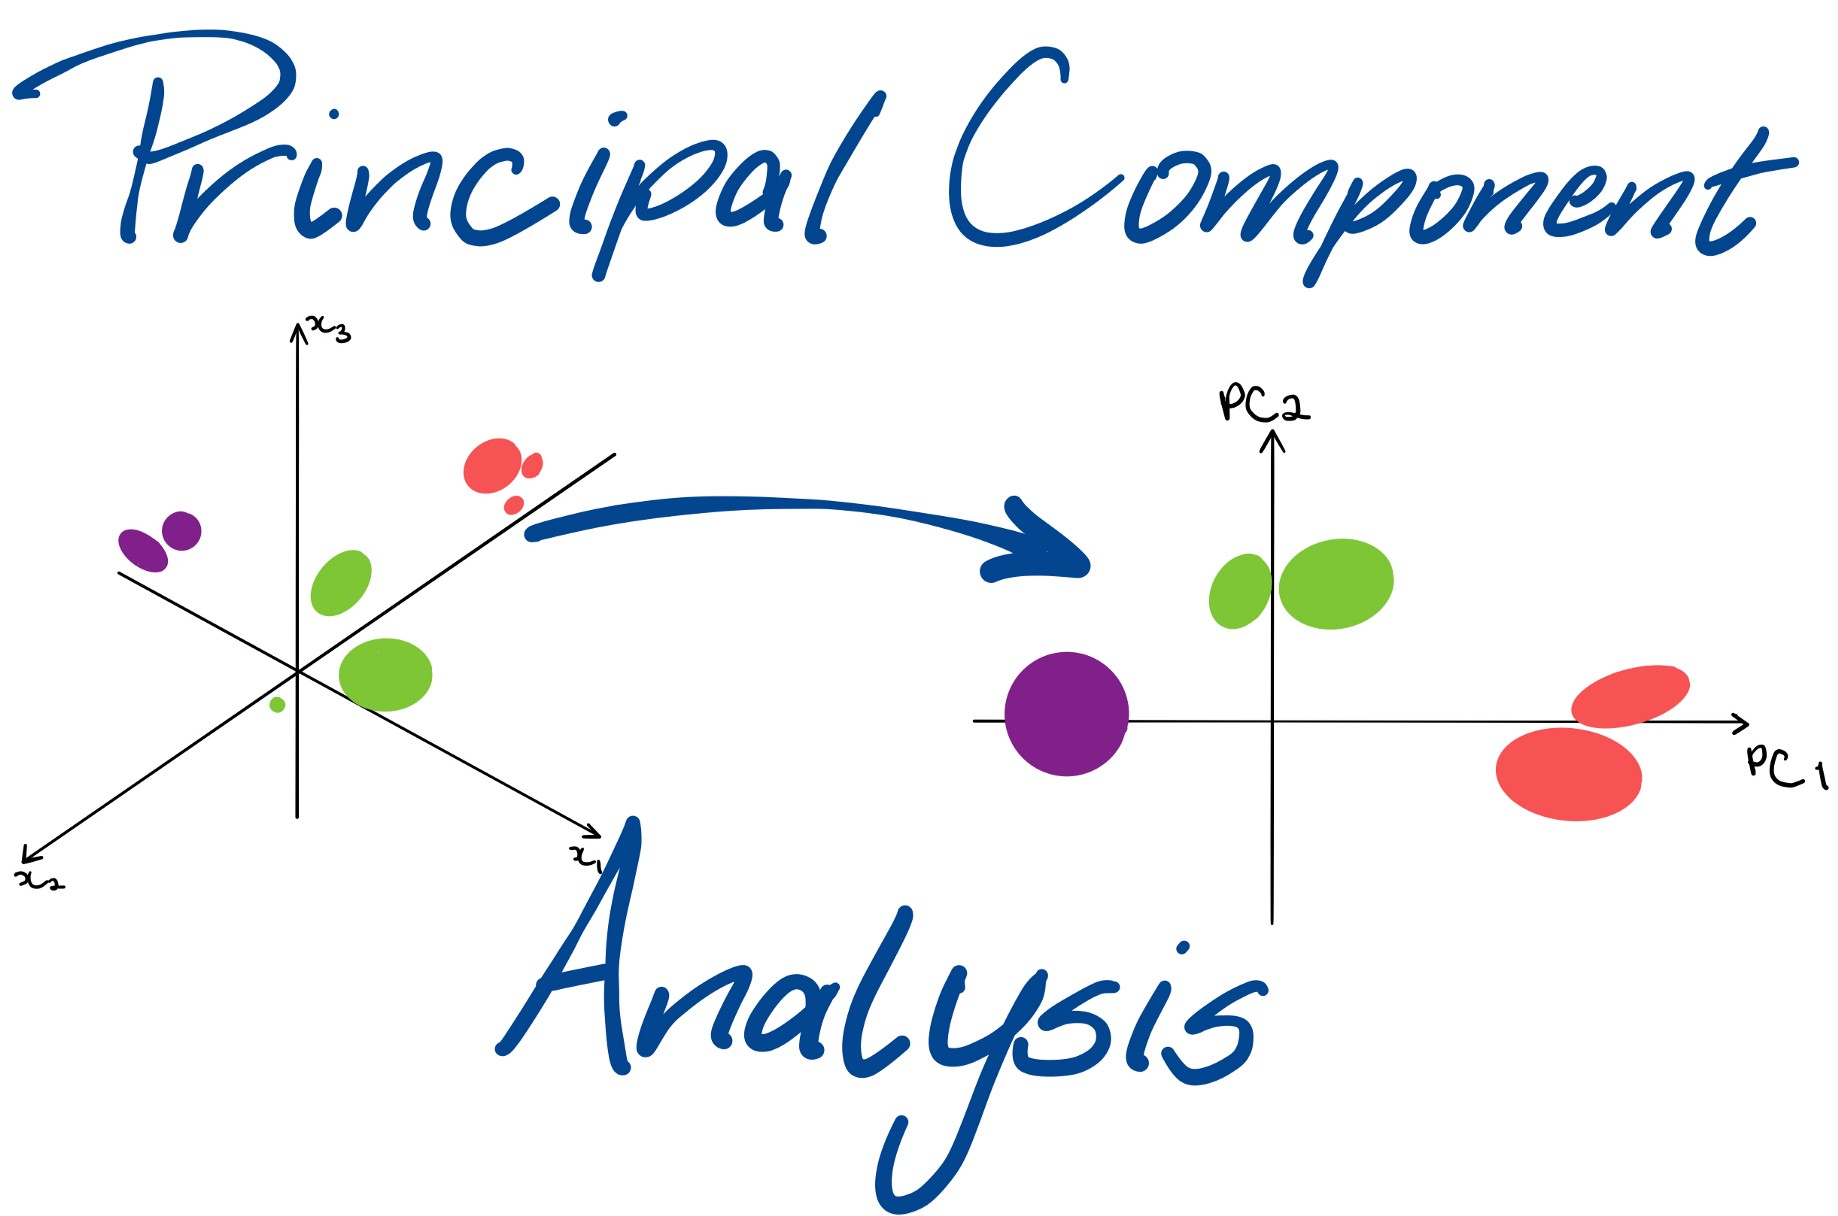

### Medium Stories about PCA:
#### Understanding Principle Component Analysis(PCA) step by step:
https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9
#### The Math Behind: Everything About Principle Component Analysis (PCA):
https://medium.com/geekculture/the-math-behind-everything-about-principle-component-analysis-pca-d6f0baff5681

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('PastHires (1).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 856.0+ bytes


In [4]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [5]:
#employed içindeki yes no yu 1 ve 0 a cevirme
#1.YOL
df1=df.replace({'Y':1,'N':0})
df1

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,BS,0,0,1
1,0,0,0,BS,1,1,1
2,7,0,6,BS,0,0,0
3,2,1,1,MS,1,0,1
4,20,0,2,PhD,1,0,0
5,0,0,0,PhD,1,1,1
6,5,1,2,MS,0,1,1
7,3,0,1,BS,0,1,1
8,15,1,5,BS,0,0,1
9,0,0,0,BS,0,0,0


## 2.YOL

In [6]:
d={'Y':1,'N':0}

In [7]:
df['Employed?']=df['Employed?'].map(d)

In [8]:
df['Top-tier school']=df['Top-tier school'].map(d)

In [9]:
df['Interned']=df['Interned'].map(d)

In [10]:
df['Hired']=df['Hired'].map(d)

In [11]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,BS,0,0,1
1,0,0,0,BS,1,1,1
2,7,0,6,BS,0,0,0
3,2,1,1,MS,1,0,1
4,20,0,2,PhD,1,0,0
5,0,0,0,PhD,1,1,1
6,5,1,2,MS,0,1,1
7,3,0,1,BS,0,1,1
8,15,1,5,BS,0,0,1
9,0,0,0,BS,0,0,0


In [12]:
#level of edu  içindeki bs ms phd  yi 1 ,2,3  e cevirme

df=df.replace({'BS':1,'MS':2,'PhD':3})
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0
5,0,0,0,3,1,1,1
6,5,1,2,2,0,1,1
7,3,0,1,1,0,1,1
8,15,1,5,1,0,0,1
9,0,0,0,1,0,0,0


In [13]:
df.replace({'BS':1,'MS':2,'PhD':3},inplace=True)


In [14]:
#same time ,you can do wtih together these 2 code
##df.replace({'Y':1,'N':0,'BS':1,'MS':2,'PhD':3},inplace=True)
#df

In [15]:
df.corr(method='kendall')#işe alımdaki etki yüzdeleri

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
Years Experience,1.000000,0.409946,0.803970,-0.200000,-0.381881,-0.223607,-0.098209
Employed?,0.409946,1.000000,0.411844,-0.268328,-0.414758,0.025000,0.527046
Previous employers,0.803970,0.411844,1.000000,-0.245576,-0.459335,-0.294174,-0.144707
Level of Education,-0.200000,-0.268328,-0.245576,1.000000,0.720119,-0.134164,-0.141421
Top-tier school,-0.381881,-0.414758,-0.459335,0.720119,1.000000,-0.097590,-0.051434
Interned,-0.223607,0.025000,-0.294174,-0.134164,-0.097590,1.000000,0.527046
Hired,-0.098209,0.527046,-0.144707,-0.141421,-0.051434,0.527046,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Years Experience    13 non-null     int64
 1   Employed?           13 non-null     int64
 2   Previous employers  13 non-null     int64
 3   Level of Education  13 non-null     int64
 4   Top-tier school     13 non-null     int64
 5   Interned            13 non-null     int64
 6   Hired               13 non-null     int64
dtypes: int64(7)
memory usage: 856.0 bytes


In [17]:
df[df['Employed?']==1]#burada employed işli ve hired işe alınan olarak geeçiyor. Yani biz işsiz birini almamısız. Acaba biz hiired i çıkarırsak employed bizim için yeterli bir kıstas mı

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
3,2,1,1,2,1,0,1
6,5,1,2,2,0,1,1
8,15,1,5,1,0,0,1
11,4,1,1,1,0,1,1


In [18]:
#x=df[df['Years Experience',Employed?	Previous employers	Level of Education	Top-tier school	Interned	Hired]]
#y=df['Hired']
y=df.Hired

In [29]:
x=df.drop('Hired',axis=1)#HİRED KISMINI CIKARIYORUZ

In [30]:
x.columns#CIKIP CIKMADIGINI KONTROL EDIYORUZ

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned'],
      dtype='object')

In [21]:
features=list(df.columns[:6])
features#FEATURES E  E İLK 6 SUTUNU AL SON 3 SUTUNU ALMA DEMEK

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [22]:
x=df[features]

In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:
clf=DecisionTreeClassifier()


In [25]:
clf=clf.fit(x,y)

In [33]:
clf.predict([[10,1,4,3,1,0]])#bu ozelliklere saip olan birisi(year experience=10 vb) işe alınırsa array sonucu 1 i verir

C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [35]:
clf.predict([[5,0,0,0,0,1]])

C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### PCA= Principle Component Analysis- Dimension Reduction

In [36]:
from sklearn.decomposition import PCA


In [73]:
pca=PCA(n_components=3)

In [74]:
x_r=pca.fit_transform(x)

In [75]:
x

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,1,0,0
1,0,0,0,1,1,1
2,7,0,6,1,0,0
3,2,1,1,2,1,0
4,20,0,2,3,1,0
5,0,0,0,3,1,1
6,5,1,2,2,0,1
7,3,0,1,1,0,1
8,15,1,5,1,0,0
9,0,0,0,1,0,0


In [76]:
x_r#bu sonuc bizim 6 sutun ile aynı 1 doların 16tlye esıt olması gibi,faydası bilgisauyarı 6 sutunla zorlamak yerine 3 sutunla mesgul ed,cez

array([[ 5.24334202,  1.44035987, -0.23023103],
       [-5.4357303 , -0.39779498, -0.84791186],
       [ 2.7141434 ,  3.69794245,  0.99160819],
       [-3.2298904 , -0.17360724,  0.29113278],
       [14.52914147, -3.35675431,  0.24494579],
       [-5.4535318 , -1.15449264,  0.71456348],
       [-0.0994785 ,  0.27267848, -0.15606239],
       [-2.27656378,  0.08672358, -0.99961407],
       [10.33738351,  1.31731069, -0.22055745],
       [-5.38868351, -0.15087362, -0.87068625],
       [-4.23706995, -0.44155051,  1.33351314],
       [-1.27828498, -0.02368197, -1.26075676],
       [-5.42477717, -1.11625979,  1.01005644]])

In [77]:
pca.explained_variance_ratio_

array([0.91678377, 0.057677  , 0.0156408 ])

In [78]:
sum(pca.explained_variance_ratio_)

0.9901015694628884

In [79]:
clf=clf.fit(x_r,y)

In [80]:
from sklearn import datasets

In [81]:
iris=datasets.load_iris()

In [82]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [83]:
df=pd.DataFrame(iris["data"])
df 

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [84]:
df_r=pca.fit_transform(df)
df_r

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [85]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [86]:
sum(pca.explained_variance_ratio_)

0.9947878161267248